<a href="https://colab.research.google.com/github/stephenbrutch/Machine-Learning-Projects/blob/main/hand_written_mnist_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code going to work on
* loading in the tensorflow handwritten numbers for classification

# Import Data/Visualize Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#the data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#show the first training example
#print(f"training sample:\n{train_data[0]}\n")
#print(f"training label:\n{train_labels[0]}\n")

In [ ]:
#check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

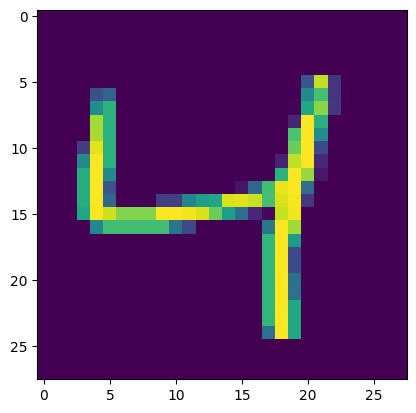

In [ ]:
#plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[2])

In [ ]:
#check out training label
train_labels[2]

4

In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Text(0.5, 1.0, '4')

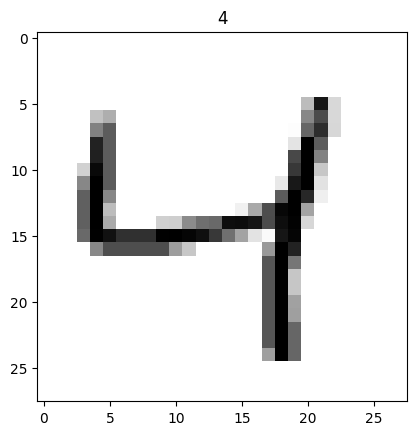

In [ ]:
#plot another image and its label
index_of_chocie=2
plt.imshow(train_data[index_of_chocie],cmap=plt.cm.binary)
plt.title(train_labels[index_of_chocie])

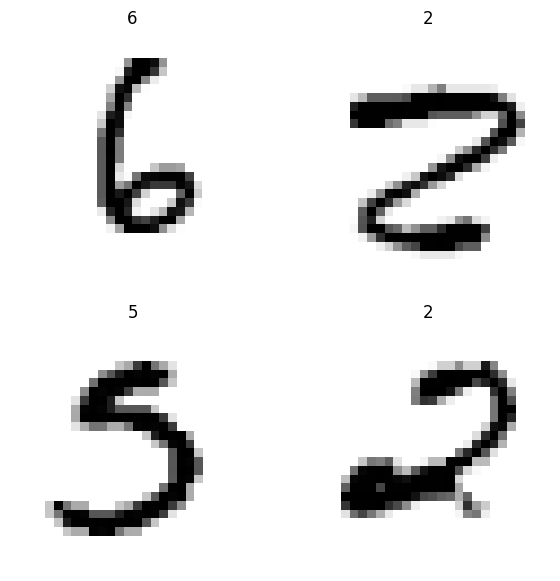

In [ ]:
#plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

# Fixing up the Data

In [ ]:
#determine input shape of each data point
train_data[0].shape

(28, 28)

* Our model has an input shape of 28,28 thus we must flatten it in the input shape layer

In [ ]:
#check the min and max of the training data because we want to normalize it (data from 0 to 1)
train_data.min(),train_data.max()

(0, 255)

In [ ]:
#we can get our training and testing data from 0 and 1 by dividing by the maximum number. -> scaling normalization
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#now check the min and max
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

# Building the Model and Fitting the model

In [ ]:
#Lets build a model with normalized data
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tf.keras.layers.Dense(4,activation="relu"),
    #tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation. Sparse bc of labels are in integer form
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model
norm_history=model_1.fit(train_data_norm,
                          train_labels,
                          epochs=5,
                          validation_data=(test_data_norm,test_labels),
                          verbose=1)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4714 - accuracy: 0.8762 - val_loss: 0.3067 - val_accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3036 - accuracy: 0.9151 - val_loss: 0.2818 - val_accuracy: 0.9216
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2831 - accuracy: 0.9211 - val_loss: 0.2728 - val_accuracy: 0.9233
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2728 - accuracy: 0.9236 - val_loss: 0.2706 - val_accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9256 - val_loss: 0.2672 - val_accuracy: 0.9263


* Val accuracy of normalized data = ~92%

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tf.keras.layers.Dense(4,activation="relu"),
    #tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model
non_norm_history=model_2.fit(train_data,
                             train_labels,
                             epochs=5,
                             validation_data=(test_data,test_labels),
                             verbose=1)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.6562 - accuracy: 0.8408 - val_loss: 6.9977 - val_accuracy: 0.8652
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 6.0459 - accuracy: 0.8792 - val_loss: 5.8024 - val_accuracy: 0.8772
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7629 - accuracy: 0.8807 - val_loss: 5.4958 - val_accuracy: 0.8975
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4356 - accuracy: 0.8868 - val_loss: 5.7025 - val_accuracy: 0.8879
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3997 - accuracy: 0.8865 - val_loss: 5.4535 - val_accuracy: 0.8970


* val accuracy of non normalized data is ~88%

<Axes: title={'center': 'normalized data'}>

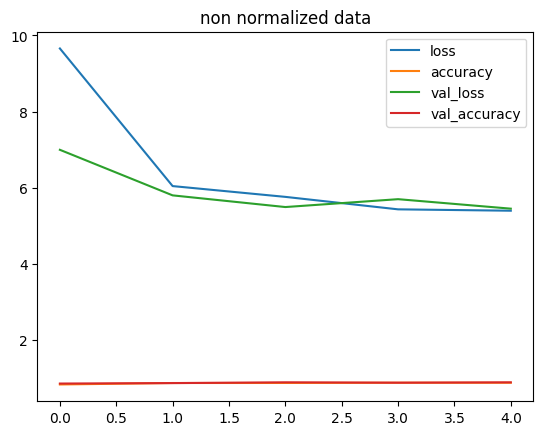

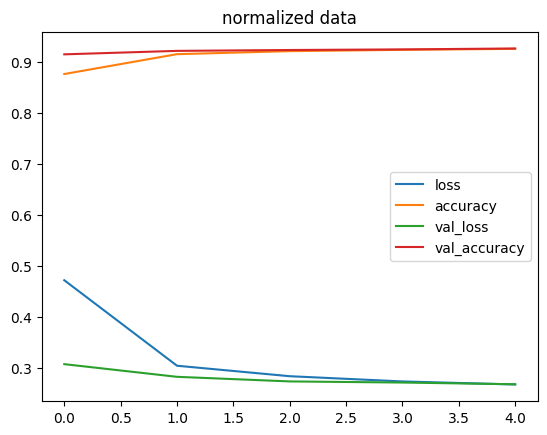

In [ ]:
import pandas as pd

#plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="non normalized data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="normalized data")

# Find the Ideal Learning Rate

In [ ]:
# set random seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tf.keras.layers.Dense(4,activation="relu"),
    #tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#fit the model
find_lr_history=model_3.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_scheduler],
                            verbose=1)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4646 - accuracy: 0.8781 - val_loss: 0.3081 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.9148 - val_loss: 0.2821 - val_accuracy: 0.9226 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2827 - accuracy: 0.9208 - val_loss: 0.2733 - val_accuracy: 0.9229 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9235 - val_loss: 0.2721 - val_accuracy: 0.9242 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9253 - val_loss: 0.2719 - val_accuracy: 0.9249 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2639 - accuracy: 0.9263 - val_loss: 0.2662 - val_accuracy: 0.9264 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the ideal learning rate')

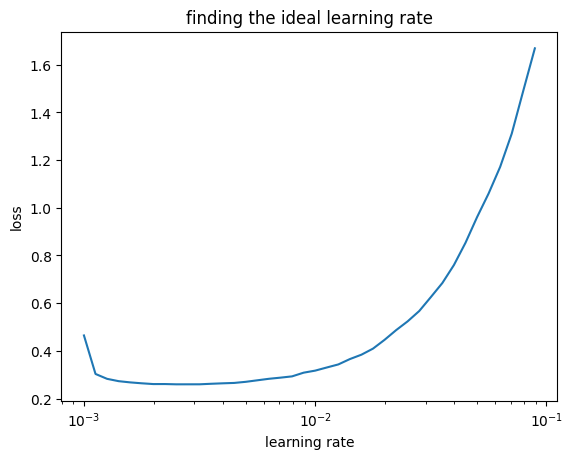

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

* Looks like 10^-3 is the ideal learning rate which is also the default Adam optimizer learning rate

In [ ]:
#Lets refit the model with the ideal learning rate

#set random seed
tf.random.set_seed(42)

#create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tf.keras.layers.Dense(4,activation="relu"),
    #tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

#fit the model
history_4=model_4.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm,test_labels),
                      verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4670 - accuracy: 0.8785 - val_loss: 0.3069 - val_accuracy: 0.9152
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3029 - accuracy: 0.9152 - val_loss: 0.2821 - val_accuracy: 0.9225
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.9203 - val_loss: 0.2730 - val_accuracy: 0.9234
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.9233 - val_loss: 0.2708 - val_accuracy: 0.9249
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9256 - val_loss: 0.2672 - val_accuracy: 0.9256
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9269 - val_loss: 0.2627 - val_accuracy: 0.9279
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2579 - accuracy: 0.9283 - val_loss: 0.2670 - val_accuracy:

In [ ]:
model_4.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9279


[0.26749590039253235, 0.9279000163078308]

# Make Some Predictions and Visualize Them

In [ ]:
#make some predictions with our model
y_probs=model_4.predict(test_data_norm) #probs is short for prediction probabilities
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.74881514e-08, 3.87685591e-14, 1.22463092e-07, 2.27357727e-03,
        5.31310782e-08, 1.22818665e-05, 1.82780410e-14, 9.97570813e-01,
        6.61322247e-06, 1.36496950e-04],
       [2.80827480e-05, 1.23055838e-06, 9.96508181e-01, 2.21200753e-06,
        5.09226546e-17, 1.86915940e-03, 1.58166199e-03, 4.51172650e-22,
        9.55688847e-06, 1.64511205e-19],
       [2.38721896e-07, 9.86816525e-01, 9.04613733e-03, 8.88489769e-04,
        5.31458827e-05, 5.77425584e-04, 5.32473205e-04, 3.13764431e-05,
        1.94159162e-03, 1.12550937e-04],
       [9.99939501e-01, 3.65518423e-12, 1.48505733e-05, 7.45001273e-07,
        7.06682757e-09, 1.10934971e-05, 2.64370992e-05, 1.44202488e-06,
        1.89663410e-06, 4.02108344e-06],
       [2.40352208e-04, 2.57052459e-08, 8.24612507e-04, 5.45423472e-06,
        9.81707573e-01, 4.23048550e-05, 6.39580365e-04, 1.94803439e-03,
        6.65929751e-04, 1.39261503e-02]], dtype=float32)

In [ ]:
test_labels[0]

7

* y_probs[0] shows the 7th entry is the hightest probability and that corresponds to the number 7. the test label is 7 so it is correct

In [ ]:
y_probs[0],tf.argmax(y_probs[0])

(array([1.74881514e-08, 3.87685591e-14, 1.22463092e-07, 2.27357727e-03,
        5.31310782e-08, 1.22818665e-05, 1.82780410e-14, 9.97570813e-01,
        6.61322247e-06, 1.36496950e-04], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))


  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label =pred_probs.argmax()
  true_label = true_labels[i]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)


  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
  plt.show()


1/1 [==============================] - 0s 21ms/step


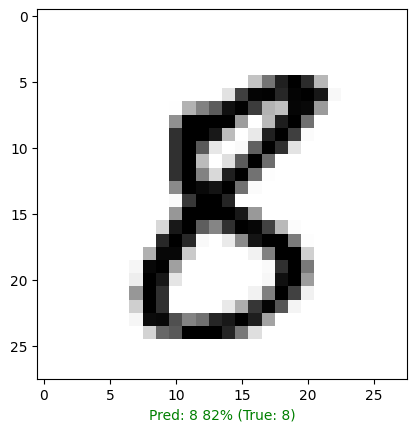

In [ ]:
plot_random_image(model_4,test_data_norm,test_labels)

1/1 [==============================] - 0s 27ms/step


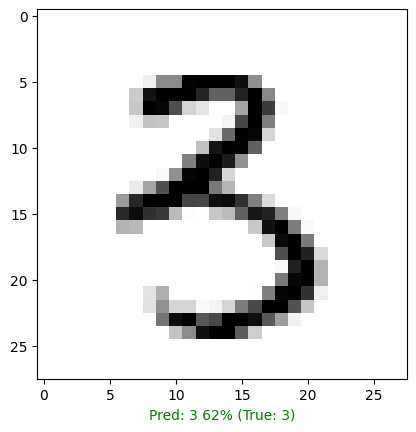

In [ ]:
# check out a random image as well as its prediction
plot_random_image(model_4,test_data_norm,test_labels)

# Create Confusion Matrix

In [ ]:
#Create a random confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


## Make Non Visual Confusion Matrix

In [ ]:
#make some predictions with our model
y_probs=model_4.predict(test_data_norm)

#convert all of the prediction probabilities into integers
y_preds=y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm=confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)
cm

array([[ 961,    0,    0,    2,    1,    7,    5,    3,    1,    0],
       [   0, 1114,    5,    1,    0,    1,    3,    2,    9,    0],
       [   6,    9,  936,   14,    6,    3,   10,   11,   33,    4],
       [   3,    0,   19,  919,    0,   22,    2,   11,   27,    7],
       [   2,    1,    6,    2,  913,    0,    9,    8,   11,   30],
       [   7,    2,    3,   32,   10,  779,   13,    8,   34,    4],
       [  13,    3,    9,    1,    7,   15,  906,    1,    3,    0],
       [   1,    6,   23,    3,    4,    1,    0,  964,    2,   24],
       [   7,    9,    6,   17,    8,   22,    8,   11,  877,    9],
       [  10,    8,    1,    8,   26,    7,    0,   32,    7,  910]])

## Make Visual Confusion Matrix

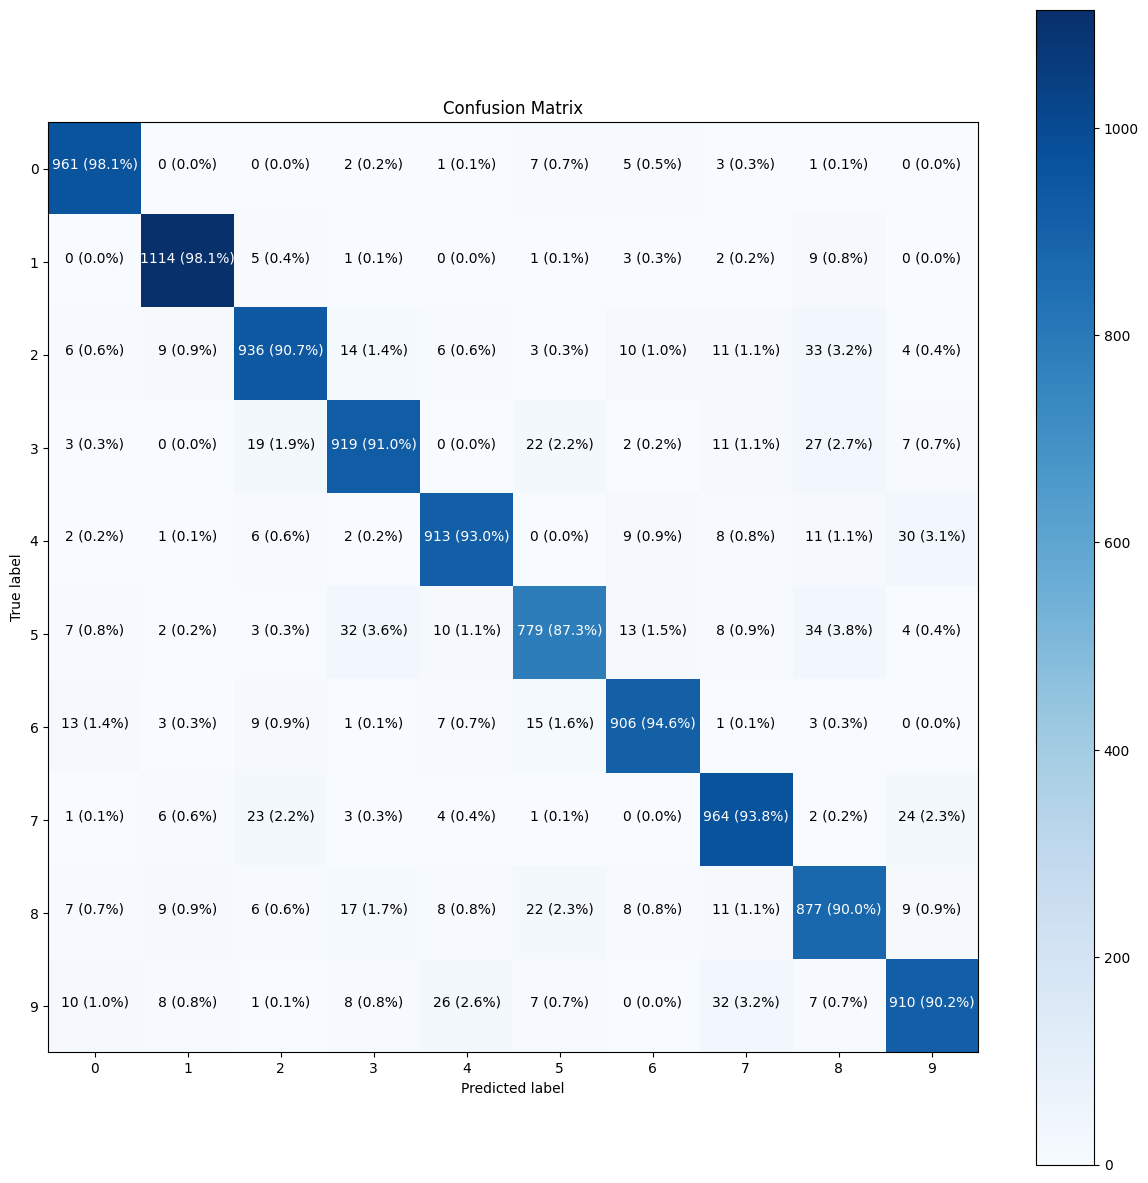

In [ ]:
figsize=(15, 15)
text_size=10


# Create the confustion matrix
#cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0] # find the number of classes we're dealing with

# Plot the figure and make it pretty
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
fig.colorbar(cax)

labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
xlabel="Predicted label",
ylabel="True label",
xticks=np.arange(n_classes), # create enough axis slots for each class
yticks=np.arange(n_classes),
xticklabels=labels, # axes will labeled with class names (if they exist) or ints
yticklabels=labels)

# Make x-axis labels appear on bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
          horizontalalignment="center",
          color="white" if cm[i, j] > threshold else "black",
          size=text_size)

## Just additional practice

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu",input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

#fit the model
history_5=model_5.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm,test_labels),
                      verbose=1)

Epoch 1/20


ValueError: ignored